In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import os

try:
    os.mkdir('/content/data')
except OSError:
    print ("Creation of the directory failed")
else:
    print ("Successfully created the directory")
os.chdir('/content/data')
print(os.getcwd())

Successfully created the directory
/content/data


In [3]:
import requests

url = 'https://www.datos.gov.co/api/views/gt2j-8ykr/rows.csv?accessType=DOWNLOAD'
r = requests.get(url, allow_redirects=True)
open('Casos_positivos_de_COVID-19_en_Colombia.csv', 'wb').write(r.content)

866909391

In [4]:
import pandas as pd

data = pd.read_csv('Casos_positivos_de_COVID-19_en_Colombia.csv', sep=',')
data

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,6/3/2020 0:00:00,1,2/3/2020 0:00:00,11,BOGOTA,11001,BOGOTA,19,1,F,Importado,Casa,Leve,380.0,ITALIA,Recuperado,27/2/2020 0:00:00,NaN,6/3/2020 0:00:00,13/3/2020 0:00:00,PCR,6.0,NaN
1,9/3/2020 0:00:00,2,6/3/2020 0:00:00,76,VALLE,76111,BUGA,34,1,M,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,4/3/2020 0:00:00,NaN,9/3/2020 0:00:00,19/3/2020 0:00:00,PCR,5.0,NaN
2,9/3/2020 0:00:00,3,7/3/2020 0:00:00,5,ANTIOQUIA,5001,MEDELLIN,50,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,29/2/2020 0:00:00,NaN,9/3/2020 0:00:00,15/3/2020 0:00:00,PCR,6.0,NaN
3,11/3/2020 0:00:00,4,9/3/2020 0:00:00,5,ANTIOQUIA,5001,MEDELLIN,55,1,M,Relacionado,Casa,Leve,NaN,NaN,Recuperado,6/3/2020 0:00:00,NaN,11/3/2020 0:00:00,26/3/2020 0:00:00,PCR,6.0,NaN
4,11/3/2020 0:00:00,5,9/3/2020 0:00:00,5,ANTIOQUIA,5001,MEDELLIN,25,1,M,Relacionado,Casa,Leve,NaN,NaN,Recuperado,8/3/2020 0:00:00,NaN,11/3/2020 0:00:00,23/3/2020 0:00:00,PCR,6.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992581,25/10/2021 0:00:00,4992622,6/9/2021 0:00:00,70,SUCRE,70215,COROZAL,62,1,M,En estudio,Casa,Leve,NaN,NaN,Activo,2/9/2021 0:00:00,NaN,17/9/2021 0:00:00,NaN,NaN,NaN,NaN
4992582,25/10/2021 0:00:00,4992623,13/8/2021 0:00:00,19,CAUCA,19693,SAN SEBASTIAN,46,1,F,En estudio,Casa,Leve,NaN,NaN,Activo,9/8/2021 0:00:00,NaN,24/8/2021 0:00:00,NaN,NaN,NaN,NaN
4992583,25/10/2021 0:00:00,4992624,5/7/2021 0:00:00,70,SUCRE,70215,COROZAL,2,1,M,En estudio,Casa,Leve,NaN,NaN,Activo,1/7/2021 0:00:00,NaN,16/7/2021 0:00:00,NaN,NaN,NaN,NaN
4992584,25/10/2021 0:00:00,4992625,31/5/2021 0:00:00,23,CORDOBA,23555,PLANETA RICA,44,1,M,En estudio,Casa,Leve,NaN,NaN,Activo,27/5/2021 0:00:00,NaN,11/6/2021 0:00:00,NaN,NaN,NaN,NaN


In [5]:
data['Código ISO del país'] = data['Código ISO del país'].fillna(169)
data['Pertenencia étnica'] = data['Pertenencia étnica'].fillna(0)
data['Nombre del país'] = data['Nombre del país'].fillna('Colombia')
data['Fecha de recuperación'] = data['Fecha de recuperación'].fillna('No recuperado')
data['Tipo de recuperación'] = data['Tipo de recuperación'].fillna('No recuperado')
data['Fecha de inicio de síntomas'] = data['Fecha de inicio de síntomas'].fillna('No hay registro')
data['Fecha de muerte'] = data['Fecha de muerte'].fillna('No ha muerto')
data = data.drop(columns='Nombre del grupo étnico')

data

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica
0,6/3/2020 0:00:00,1,2/3/2020 0:00:00,11,BOGOTA,11001,BOGOTA,19,1,F,Importado,Casa,Leve,380.0,ITALIA,Recuperado,27/2/2020 0:00:00,No ha muerto,6/3/2020 0:00:00,13/3/2020 0:00:00,PCR,6.0
1,9/3/2020 0:00:00,2,6/3/2020 0:00:00,76,VALLE,76111,BUGA,34,1,M,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,4/3/2020 0:00:00,No ha muerto,9/3/2020 0:00:00,19/3/2020 0:00:00,PCR,5.0
2,9/3/2020 0:00:00,3,7/3/2020 0:00:00,5,ANTIOQUIA,5001,MEDELLIN,50,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,29/2/2020 0:00:00,No ha muerto,9/3/2020 0:00:00,15/3/2020 0:00:00,PCR,6.0
3,11/3/2020 0:00:00,4,9/3/2020 0:00:00,5,ANTIOQUIA,5001,MEDELLIN,55,1,M,Relacionado,Casa,Leve,169.0,Colombia,Recuperado,6/3/2020 0:00:00,No ha muerto,11/3/2020 0:00:00,26/3/2020 0:00:00,PCR,6.0
4,11/3/2020 0:00:00,5,9/3/2020 0:00:00,5,ANTIOQUIA,5001,MEDELLIN,25,1,M,Relacionado,Casa,Leve,169.0,Colombia,Recuperado,8/3/2020 0:00:00,No ha muerto,11/3/2020 0:00:00,23/3/2020 0:00:00,PCR,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992581,25/10/2021 0:00:00,4992622,6/9/2021 0:00:00,70,SUCRE,70215,COROZAL,62,1,M,En estudio,Casa,Leve,169.0,Colombia,Activo,2/9/2021 0:00:00,No ha muerto,17/9/2021 0:00:00,No recuperado,No recuperado,0.0
4992582,25/10/2021 0:00:00,4992623,13/8/2021 0:00:00,19,CAUCA,19693,SAN SEBASTIAN,46,1,F,En estudio,Casa,Leve,169.0,Colombia,Activo,9/8/2021 0:00:00,No ha muerto,24/8/2021 0:00:00,No recuperado,No recuperado,0.0
4992583,25/10/2021 0:00:00,4992624,5/7/2021 0:00:00,70,SUCRE,70215,COROZAL,2,1,M,En estudio,Casa,Leve,169.0,Colombia,Activo,1/7/2021 0:00:00,No ha muerto,16/7/2021 0:00:00,No recuperado,No recuperado,0.0
4992584,25/10/2021 0:00:00,4992625,31/5/2021 0:00:00,23,CORDOBA,23555,PLANETA RICA,44,1,M,En estudio,Casa,Leve,169.0,Colombia,Activo,27/5/2021 0:00:00,No ha muerto,11/6/2021 0:00:00,No recuperado,No recuperado,0.0


## Gráficas de tiempo

### Contagios confirmados a través del tiempo

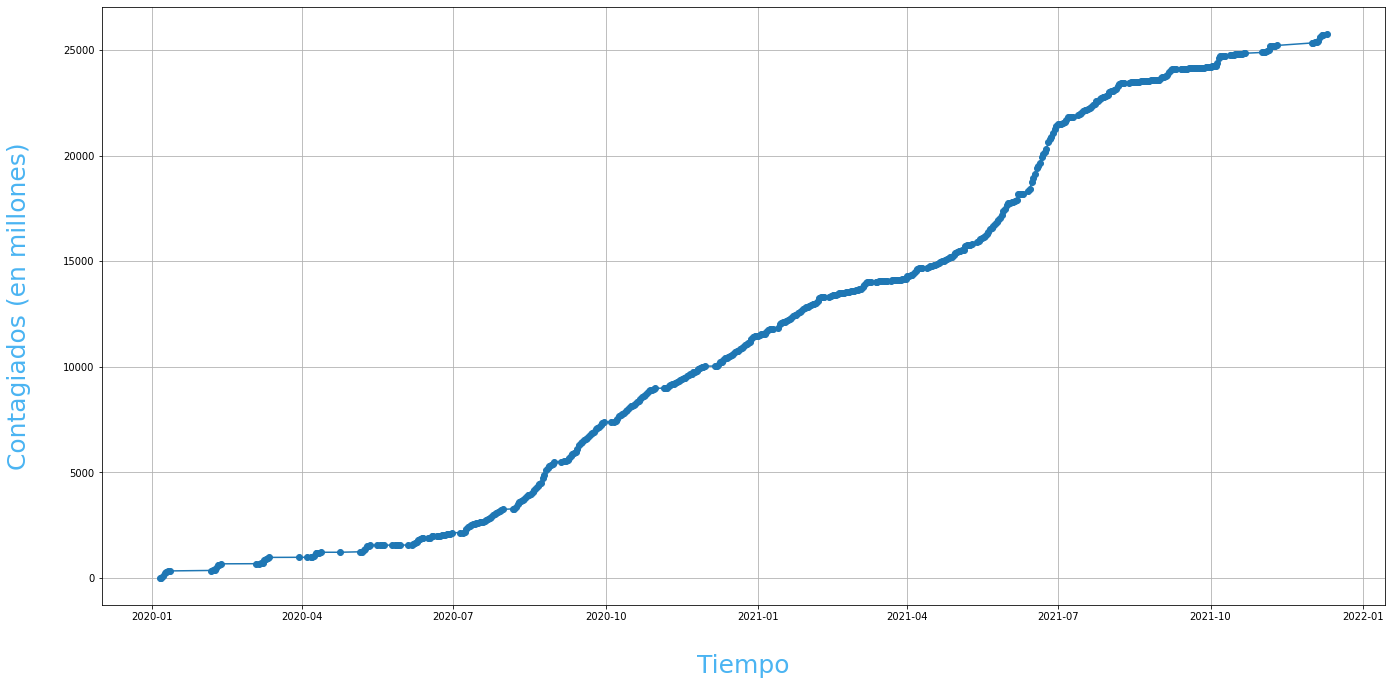

In [6]:
data['Fecha de notificación'] = pd.to_datetime(data['Fecha de notificación'])
data = data.sort_values(by="Fecha de notificación")
data = data[data['Nombre municipio']=='BARRANCABERMEJA']
fechas = data['Fecha de notificación'].drop_duplicates()
dataPorFecha = data.groupby('Fecha de notificación').count()
casosAcumuladosPorFecha = dataPorFecha['ID de caso'].cumsum()
pd.set_option("display.max_rows", None, "display.max_columns", None)

plt.figure(figsize=(23,11))
ax = plt.axes()
ax.set_xlabel('\nTiempo',size=25,color='#4bb4f2')
ax.set_ylabel('Contagiados (en millones)\n', size=25,color='#4bb4f2')
plt.plot_date(fechas,casosAcumuladosPorFecha, linestyle='solid')
plt.grid()
plt.show()

### Muertos confirmados a través del tiempo

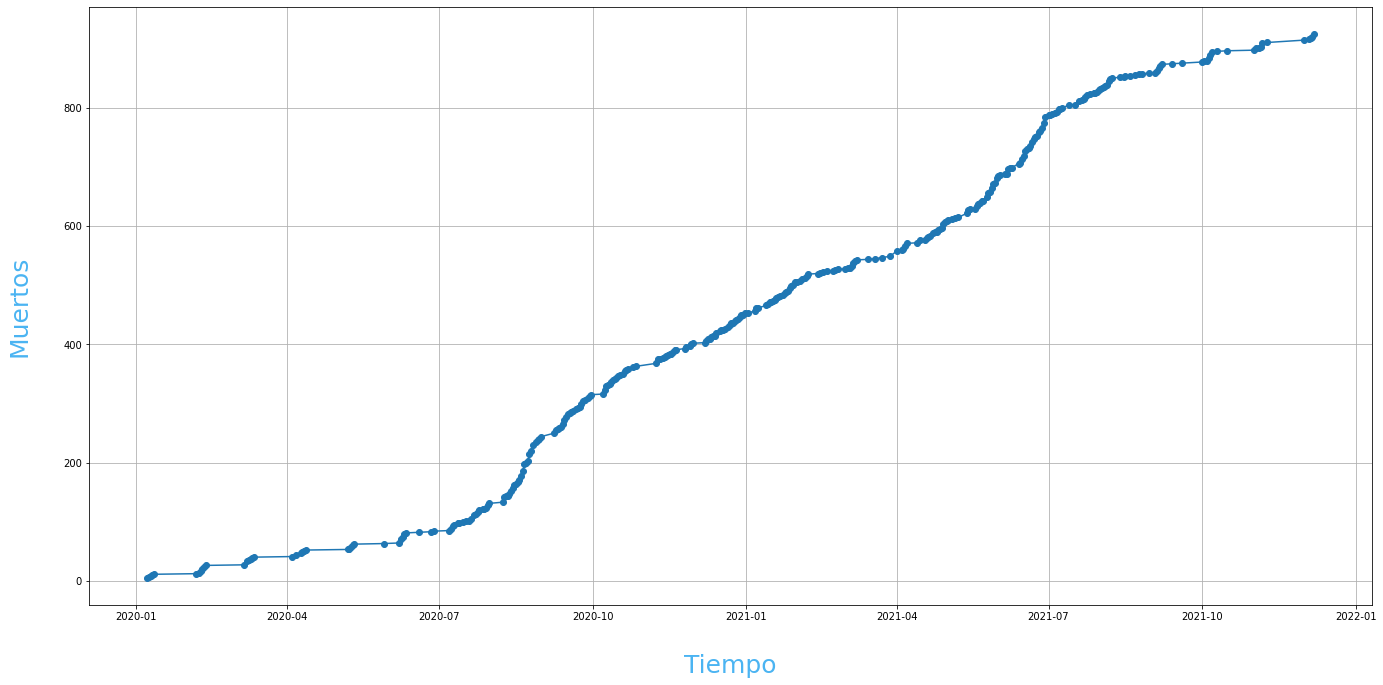

In [7]:
dataDeath = data[data['Fecha de muerte'] != 'No ha muerto']
fechasDeath = dataDeath['Fecha de notificación'].drop_duplicates()
dataDeathPorFecha = dataDeath.groupby('Fecha de notificación').count()
casosDeathAcumuladosPorFecha = dataDeathPorFecha['ID de caso'].cumsum()
pd.set_option("display.max_rows", None, "display.max_columns", None)

plt.figure(figsize=(23,11))
ax = plt.axes()
ax.set_xlabel('\nTiempo',size=25,color='#4bb4f2')
ax.set_ylabel('Muertos\n', size=25,color='#4bb4f2')
plt.plot_date(fechasDeath,casosDeathAcumuladosPorFecha, linestyle='solid')
plt.grid()
plt.show()

## Observaciones por edad sin estratificación

*   Elemento de la lista
*   Elemento de la lista



### Infectados

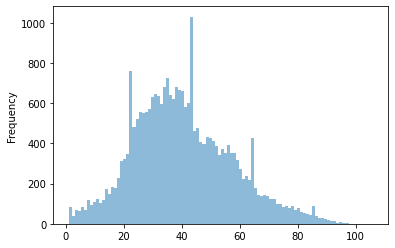

In [8]:
data['Edad'].plot.hist(bins=100, alpha=0.5)

### Muertos

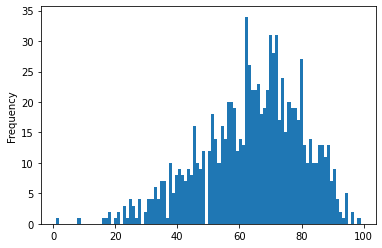

In [9]:
data1 = data[data['Fecha de muerte'] != 'No ha muerto']
data1['Edad'].plot.hist(bins=100, alpha=1)

### Infectados y muertos

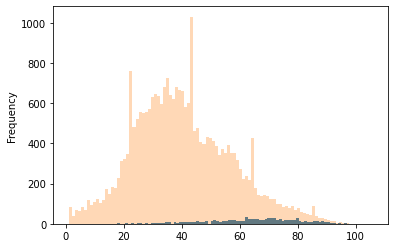

In [10]:
data1 = data[data['Fecha de muerte'] != 'No ha muerto']
data1['Edad'].plot.hist(bins=100, alpha=1)
data['Edad'].plot.hist(bins=100, alpha=0.3)

El porcentaje de mortalidad es del:

In [11]:
print (100*len(data1)/len(data),'%')

3.5927911131826304 %


## Observaciones por edad con estratificación:

1. De los 0 a los 5 años

*   Elemento de la lista
*   Elemento de la lista


2. De los 6 a los 12 años
3. De los 13 a los 26 años
4. De los 27 a los 60 años
5. Desde los 60 años

In [12]:
data0_5 = data[data.Edad <= 5]
data6_12 = data[(data.Edad >= 6) & (data.Edad <= 12)]
data13_26 = data[(data.Edad >= 13) & (data.Edad <= 26)]
data27_60 = data[(data.Edad >= 27) & (data.Edad <= 60)]
data60_max = data[data.Edad > 60]

In [13]:
num_data0_5 = len(data0_5)
num_data6_12 = len(data6_12)
num_data13_26 = len(data13_26)
num_data27_60 = len(data27_60)
num_data60_max = len(data60_max)
total = num_data0_5+num_data6_12+num_data13_26+num_data27_60+num_data60_max
print('La cantidad de personas en cada grupo es:\n')
print('1. ', num_data0_5,'\n')
print('2. ', num_data6_12,'\n')
print('3. ', num_data13_26,'\n')
print('4. ', num_data27_60,'\n')
print('5. ', num_data60_max,'\n')
print('Total: ',total) 

La cantidad de personas en cada grupo es:

1.  254 

2.  698 

3.  4317 

4.  17214 

5.  3263 

Total:  25746


In [14]:
print('Lo que indica que cada grupo representa un porcentaje del total así:\n')
print('1. ', 100*num_data0_5/total,'%\n')
print('2. ', 100*num_data6_12/total,'%\n')
print('3. ', 100*num_data13_26/total,'%\n')
print('4. ', 100*num_data27_60/total,'%\n')
print('5. ', 100*num_data60_max/total,'%\n')

Lo que indica que cada grupo representa un porcentaje del total así:

1.  0.9865610191874465 %

2.  2.711100753515109 %

3.  16.767653227685855 %

4.  66.86087159170357 %

5.  12.673813407908025 %



### Contagiados

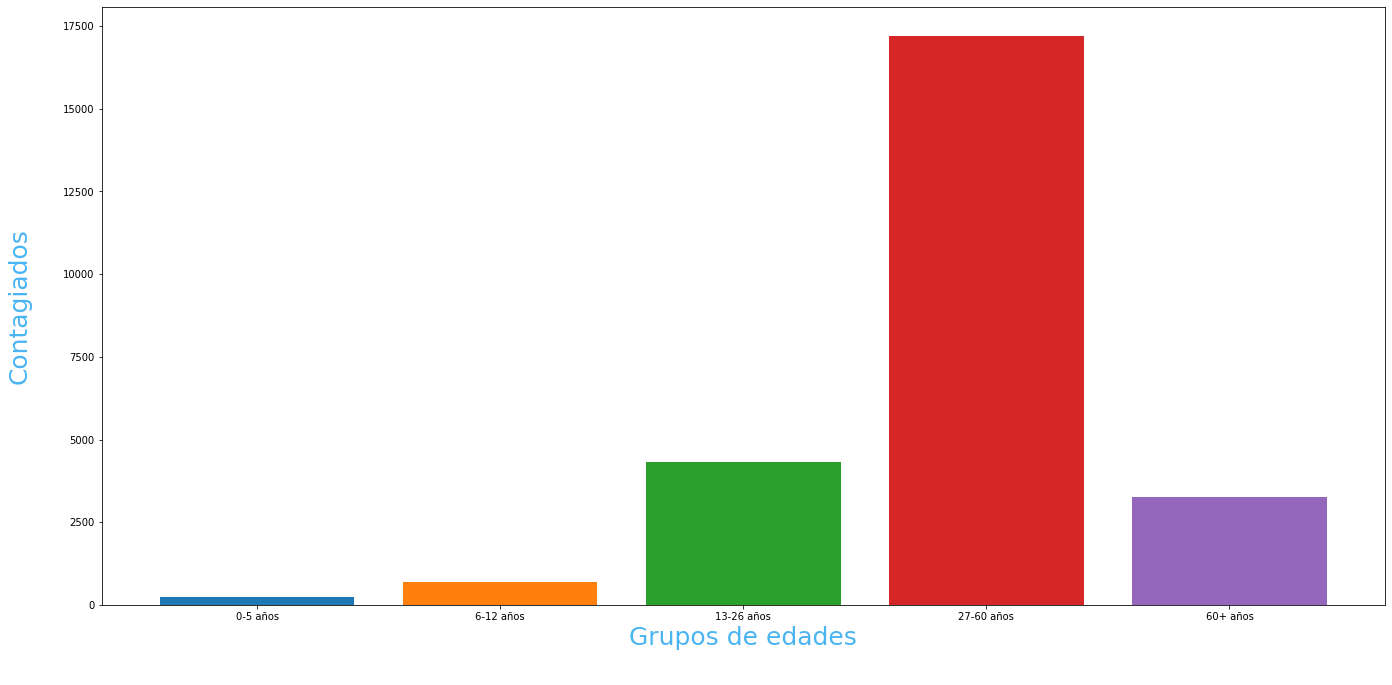

In [15]:
plt.figure(figsize=(23,11))
ax = plt.axes()
ax.set_xlabel('Grupos de edades\n',size=25,color='#4bb4f2')
ax.set_ylabel('Contagiados\n', size=25,color='#4bb4f2')
plt.bar('0-5 años',len(data0_5))
plt.bar('6-12 años',len(data6_12))
plt.bar('13-26 años',len(data13_26))
plt.bar('27-60 años',len(data27_60))
plt.bar('60+ años',len(data60_max))
plt.show()

### Muertos

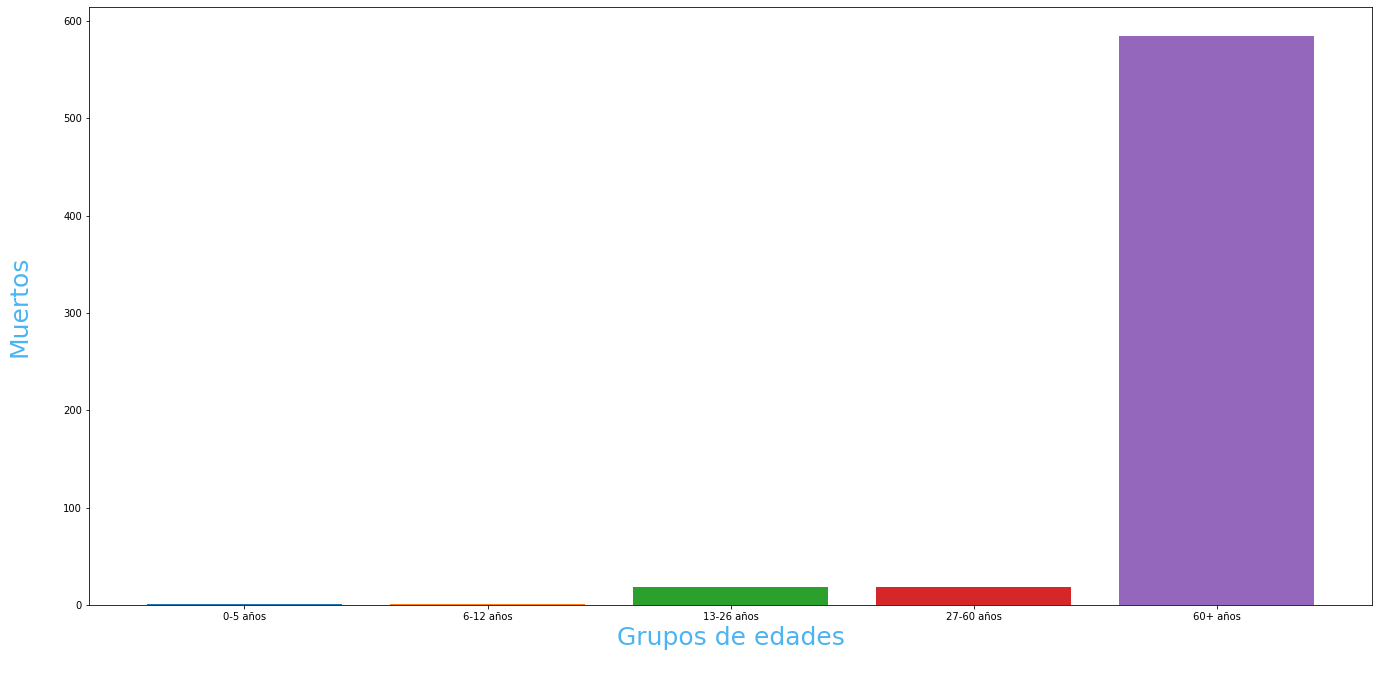

In [16]:
plt.figure(figsize=(23,11))
ax = plt.axes()
ax.set_xlabel('Grupos de edades\n',size=25,color='#4bb4f2')
ax.set_ylabel('Muertos\n', size=25,color='#4bb4f2')
plt.bar('0-5 años',len(data0_5[data0_5['Fecha de muerte'] != 'No ha muerto']))
plt.bar('6-12 años',len(data6_12[data6_12['Fecha de muerte'] != 'No ha muerto']))
plt.bar('13-26 años',len(data13_26[data13_26['Fecha de muerte'] != 'No ha muerto']))
plt.bar('27-60 años',len(data13_26[data13_26['Fecha de muerte'] != 'No ha muerto']))
plt.bar('60+ años',len(data60_max[data60_max['Fecha de muerte'] != 'No ha muerto']))
plt.show()

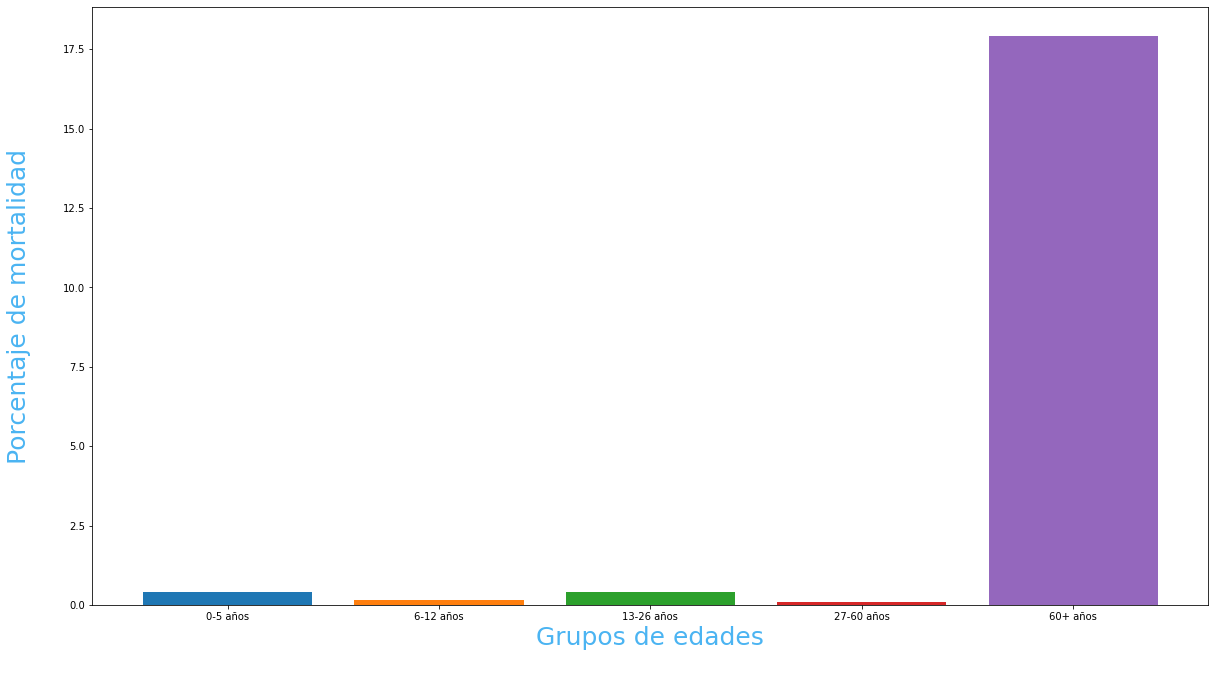

In [17]:
plt.figure(figsize=(20,11))
ax = plt.axes()
ax.set_xlabel('Grupos de edades\n',size=25,color='#4bb4f2')
ax.set_ylabel('Porcentaje de mortalidad\n', size=25,color='#4bb4f2')
plt.bar('0-5 años',100*len(data0_5[data0_5['Fecha de muerte'] != 'No ha muerto'])/len(data0_5))
plt.bar('6-12 años',100*len(data6_12[data6_12['Fecha de muerte'] != 'No ha muerto'])/len(data6_12))
plt.bar('13-26 años',100*len(data13_26[data13_26['Fecha de muerte'] != 'No ha muerto'])/len(data13_26))
plt.bar('27-60 años',100*len(data13_26[data13_26['Fecha de muerte'] != 'No ha muerto'])/len(data27_60))
plt.bar('60+ años',100*len(data60_max[data60_max['Fecha de muerte'] != 'No ha muerto'])/len(data60_max))
plt.show()

### Contagiados y muertos comparados

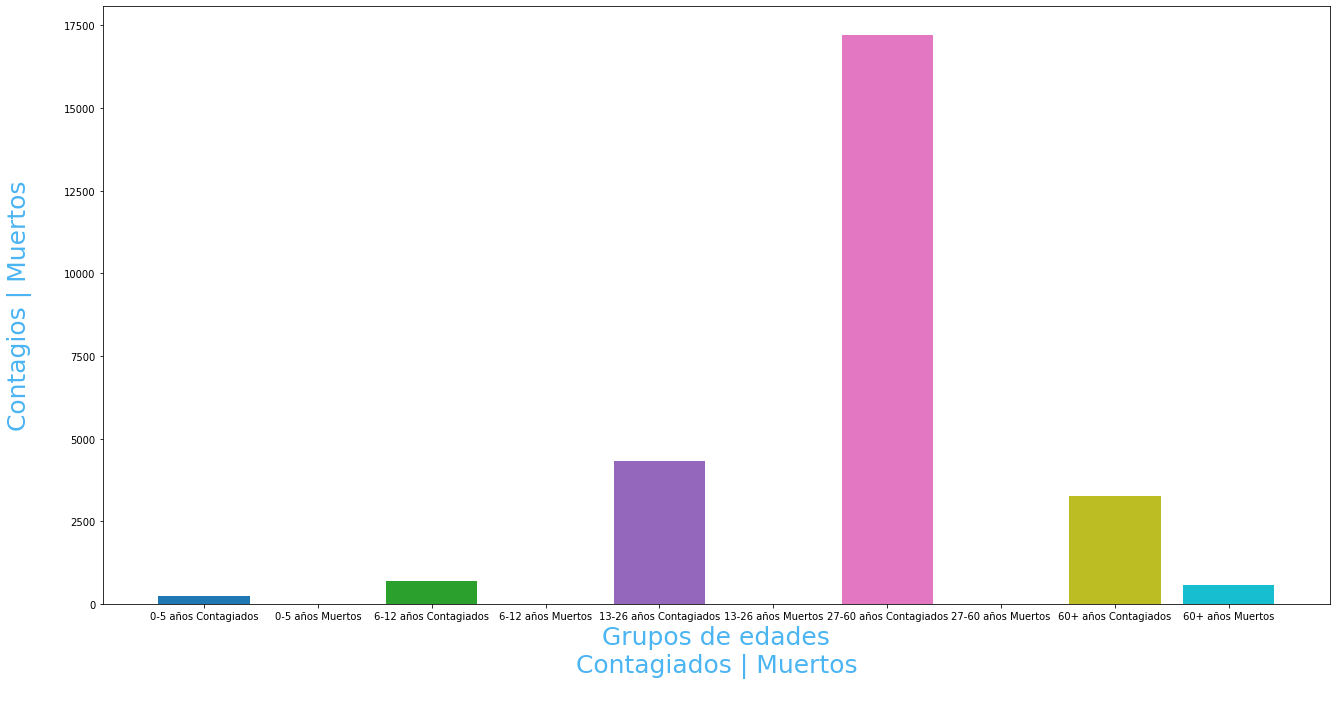

In [18]:
plt.figure(figsize=(22,11))
ax = plt.axes()
ax.set_xlabel('Grupos de edades\nContagiados | Muertos\n',size=25,color='#4bb4f2')
ax.set_ylabel('Contagios | Muertos\n', size=25,color='#4bb4f2')
plt.bar('0-5 años Contagiados',len(data0_5))
plt.bar('0-5 años Muertos',len(data0_5[data0_5['Fecha de muerte'] != 'No ha muerto']))
plt.bar('6-12 años Contagiados',len(data6_12))
plt.bar('6-12 años Muertos',len(data6_12[data6_12['Fecha de muerte'] != 'No ha muerto']))
plt.bar('13-26 años Contagiados',len(data13_26))
plt.bar('13-26 años Muertos',len(data13_26[data13_26['Fecha de muerte'] != 'No ha muerto']))
plt.bar('27-60 años Contagiados',len(data27_60))
plt.bar('27-60 años Muertos',len(data13_26[data13_26['Fecha de muerte'] != 'No ha muerto']))
plt.bar('60+ años Contagiados',len(data60_max))
plt.bar('60+ años Muertos',len(data60_max[data60_max['Fecha de muerte'] != 'No ha muerto']))
plt.show()

## División por género

### Infectados

Cantidad de hombres:  14137
Cantidad de mujeres:  11609


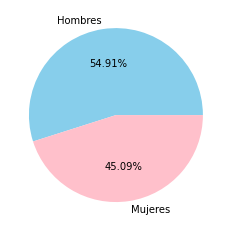

In [19]:
hombres = len(data[data.Sexo == 'M'])
mujeres = len(data[data.Sexo == 'F'])
print ('Cantidad de hombres: ', hombres)
print ('Cantidad de mujeres: ', mujeres)
plt.pie(x=[hombres,mujeres],labels=['Hombres','Mujeres'],colors=['skyblue','pink'],autopct='%.2f%%')
plt.show()

### Muertos

Cantidad de hombres:  570
Cantidad de mujeres:  355


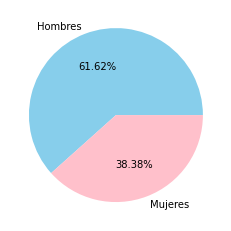

In [20]:
hombres = len(dataDeath[dataDeath.Sexo == 'M'])
mujeres = len(dataDeath[dataDeath.Sexo == 'F'])
print ('Cantidad de hombres: ', hombres)
print ('Cantidad de mujeres: ', mujeres)
plt.pie(x=[hombres,mujeres],labels=['Hombres','Mujeres'],colors=['skyblue','pink'],autopct='%.2f%%')
plt.show()

Podemos observar que no hay una preferencia sobre el género en los contagios, pero existe una tendencia a una mayor mortalidad en hombres



## Observaciones por departamentos

### Contagiados

In [21]:
data_santander = data[data['Nombre departamento']=='SANTANDER']
data_antioquia = data[data['Nombre departamento']=='ANTIOQUIA']
data_valle = data[data['Nombre departamento']=='VALLE']
data_bogota = data[data['Nombre departamento']=='BOGOTA']
data_atlantico = data[data['Nombre departamento']=='ATLANTICO']

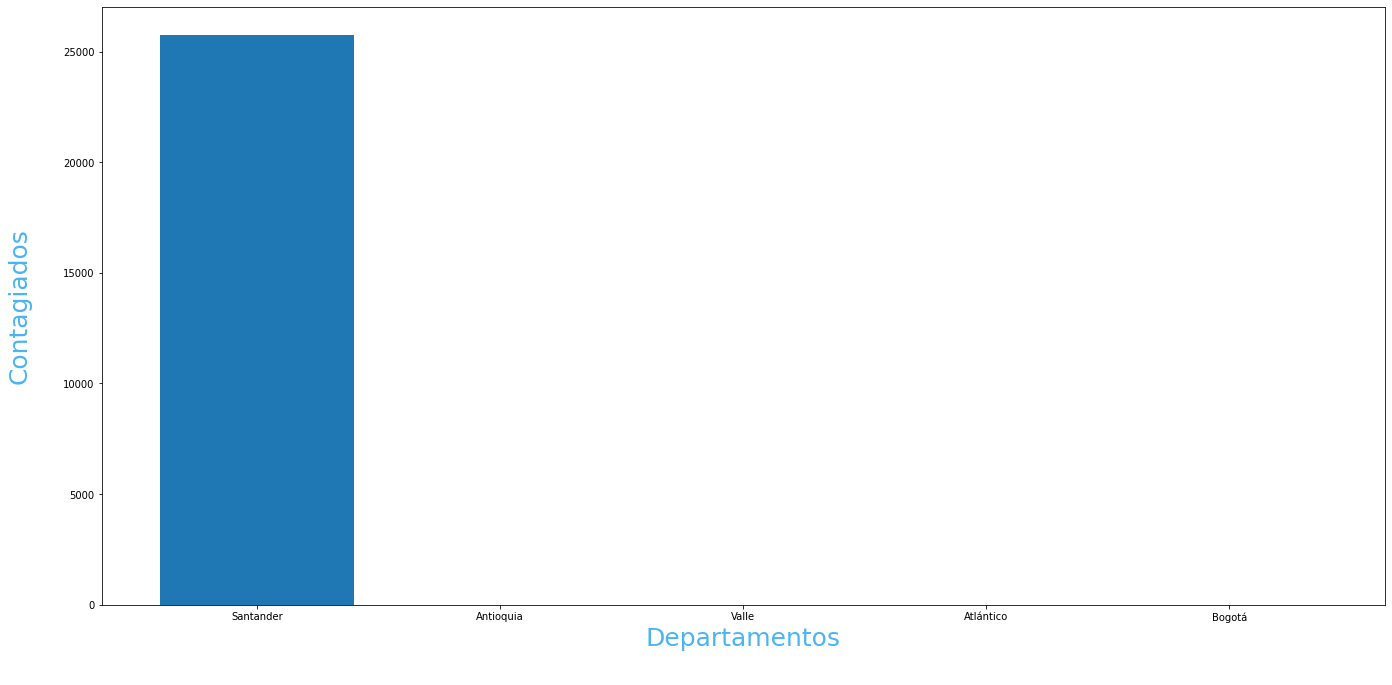

In [22]:
plt.figure(figsize=(23,11))
ax = plt.axes()
ax.set_xlabel('Departamentos\n',size=25,color='#4bb4f2')
ax.set_ylabel('Contagiados\n', size=25,color='#4bb4f2')
plt.bar('Santander',len(data_santander))
plt.bar('Antioquia',len(data_antioquia))
plt.bar('Valle',len(data_valle))
plt.bar('Atlántico',len(data_atlantico))
plt.bar('Bogotá',len(data_bogota))
plt.show()

### Muertos

In [23]:
dataDeath_santander = dataDeath[dataDeath['Nombre departamento']=='SANTANDER']
dataDeath_antioquia = dataDeath[dataDeath['Nombre departamento']=='ANTIOQUIA']
dataDeath_valle = dataDeath[dataDeath['Nombre departamento']=='VALLE']
dataDeath_bogota = dataDeath[dataDeath['Nombre departamento']=='BOGOTA']
dataDeath_atlantico = dataDeath[dataDeath['Nombre departamento']=='ATLANTICO']

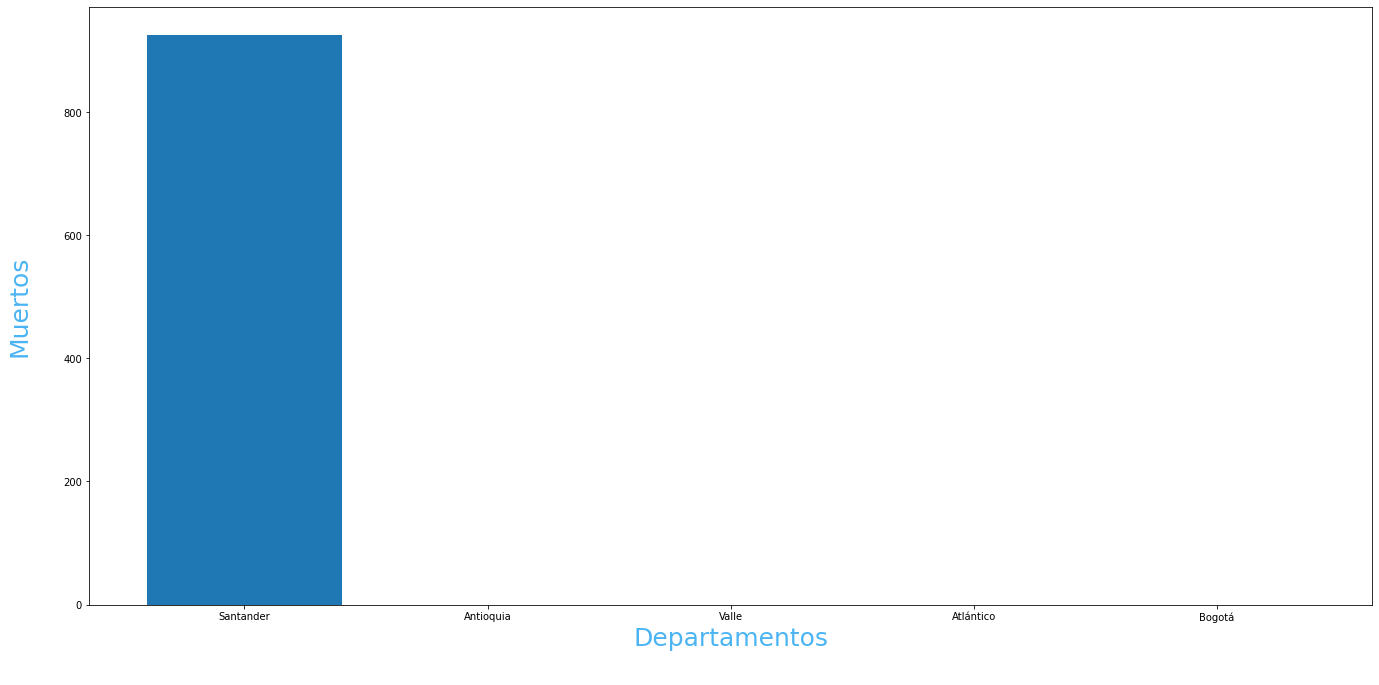

In [24]:
plt.figure(figsize=(23,11))
ax = plt.axes()
ax.set_xlabel('Departamentos\n',size=25,color='#4bb4f2')
ax.set_ylabel('Muertos\n', size=25,color='#4bb4f2')
plt.bar('Santander',len(dataDeath_santander))
plt.bar('Antioquia',len(dataDeath_antioquia))
plt.bar('Valle',len(dataDeath_valle))
plt.bar('Atlántico',len(dataDeath_atlantico))
plt.bar('Bogotá',len(dataDeath_bogota))
plt.show()

In [26]:
data = data.sort_values(by="Fecha de notificación")
dataNum = data[['Fecha de notificación','Código DIVIPOLA municipio']]
dataNum.drop(dataNum.index[:int(len(dataNum)*0.95)],0,inplace=True)

dataNum.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Fecha de notificación,Código DIVIPOLA municipio
3733859,2021-10-06,68081
3734153,2021-10-06,68081
4073642,2021-10-06,68081
4074004,2021-10-06,68081
3893878,2021-10-06,68081


In [29]:
X = dataNum[['Fecha de notificación']]
y = dataNum[['Código DIVIPOLA municipio']]
n = int(len(X)*0.8)
X_train = X[:n]
y_train = y[:n]
X_test = X[n:]
y_test = y[n:]